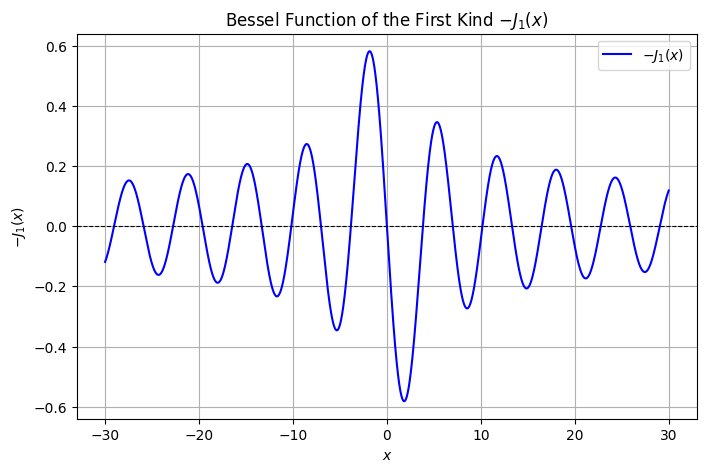

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

# Define x values for the plot
x = np.linspace(-30, 30, 10000)

# Compute Bessel function of the first kind (J_0)
y = - jv(1, x)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$-J_1(x)$", color="blue")
plt.title("Bessel Function of the First Kind $-J_1(x)$")
plt.xlabel("$x$")
plt.ylabel("$-J_1(x)$")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
import numpy as np
from scipy.special import j1
from scipy.optimize import root_scalar

def find_zeros_j1(x_start, x_end, num_zeros):
    zeros = []
    x_range = np.linspace(x_start, x_end, 300)  # Sample points to look for sign changes
    last_j1 = j1(x_range[0])
    for x in x_range[1:]:
        current_j1 = j1(x)
        if last_j1 * current_j1 <= 0 and x != 0:  # Check for sign change, exclude zero crossing at x=0
            zero = root_scalar(j1, bracket=[x_range[np.where(x_range == x)[0][0] - 1], x], method='brentq')
            if zero.converged:
                zeros.append(zero.root)
        last_j1 = current_j1
    return zeros

# Find zeros in a specified range
zeros = find_zeros_j1(-30, 30, 10)  # Increase range as needed
print("Zeros of J1(x) from -30 to 30:", zeros)

Zeros of J1(x) from -30 to 30: [-29.04682853491661, -25.903672087617917, -22.760084380592772, -19.615858510468502, -16.47063005087763, -13.323691936314265, -10.173468135062722, -7.015586669815619, -3.8317059702075125, 0.0, 3.8317059702075125, 7.015586669815619, 10.173468135062722, 13.323691936314265, 16.47063005087763, 19.615858510468502, 22.760084380592772, 25.903672087617917, 29.04682853491661]


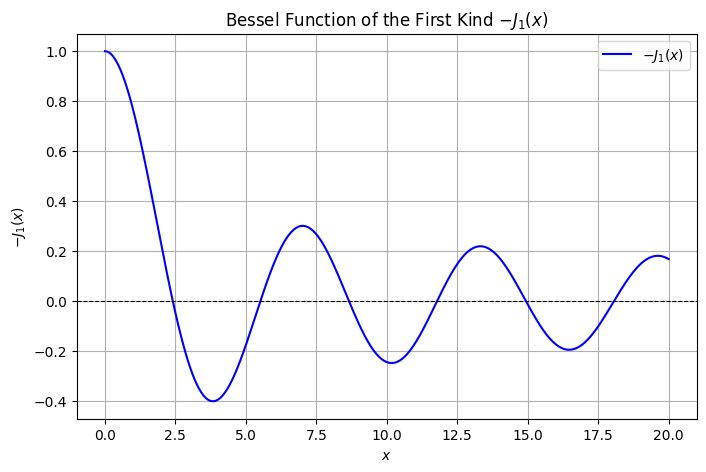

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

# Define x values for the plot
x = np.linspace(0, 20, 500)

# Compute Bessel function of the first kind (J_0)
y = jv(0, x)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$-J_1(x)$", color="blue")
plt.title("Bessel Function of the First Kind $-J_1(x)$")
plt.xlabel("$x$")
plt.ylabel("$-J_1(x)$")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(True)
plt.legend()
plt.show()

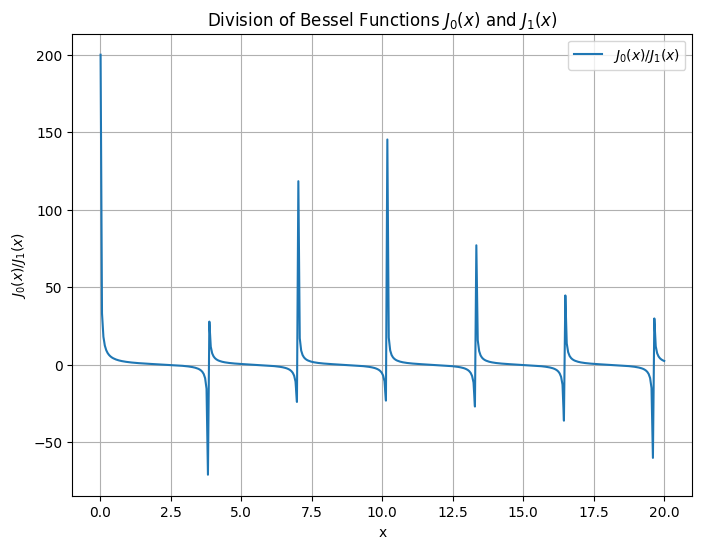

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn

# Define the range of x values
x = np.linspace(0.01, 20, 400)  # Start from 0.01 to avoid division by zero at x=0

# Compute the Bessel functions
y0 = jn(0, x)  # J_0 Bessel function
y1 = jn(1, x)  # J_1 Bessel function

# Calculate the division of J_0 by J_1
y_division = y0 / y1

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y_division, label='$J_0(x) / J_1(x)$')

# Adding labels and title
plt.xlabel('x')
plt.ylabel('$J_0(x) / J_1(x)$')
plt.title('Division of Bessel Functions $J_0(x)$ and $J_1(x)$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

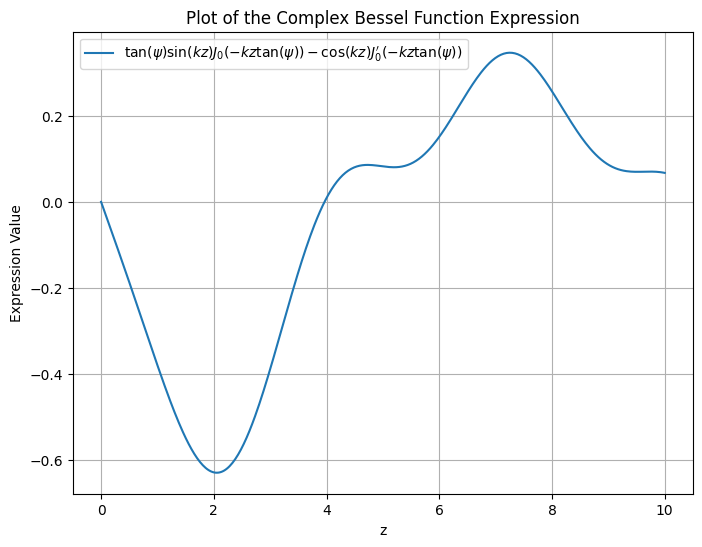

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jvp
import math

# Constants
psi = math.pi/6  # Example value for psi
k = -1.277235323      # Example wave number

# Range of z values
z = np.linspace(0, 10, 400)

# Bessel function and its derivative
J0 = jn(0, -k * z * np.tan(psi))
J0_prime = jvp(0, -k * z * np.tan(psi), n=1)

# Expression calculation
expression = np.tan(psi) * np.sin(k * z) * J0 - np.cos(k * z) * J0_prime

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(z, expression, label=r'$\tan(\psi) \sin(kz) J_0(-kz \tan(\psi)) - \cos(kz) J_0^\prime(-kz \tan(\psi))$')
plt.xlabel('z')
plt.ylabel('Expression Value')
plt.title('Plot of the Complex Bessel Function Expression')
plt.legend()
plt.grid(True)
plt.show()


-0.459888035608531


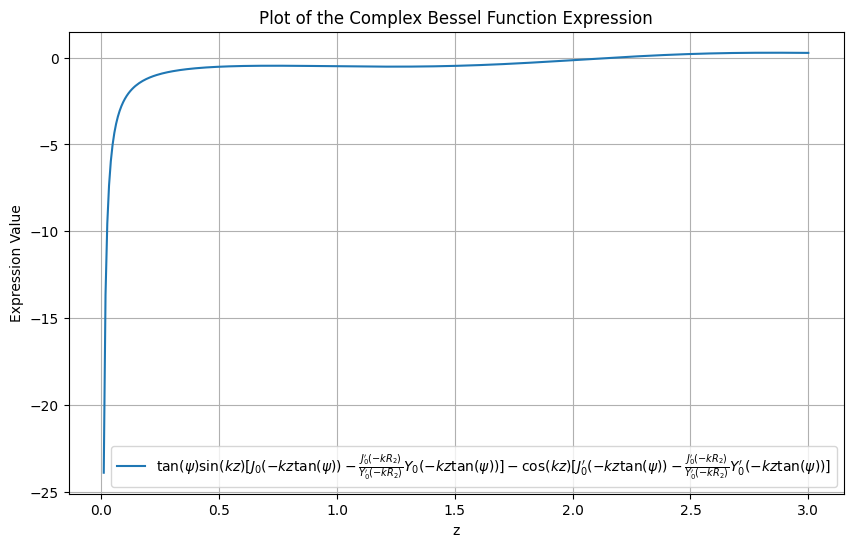

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jvp, yn, yvp
import math

# Constants
psi = math.pi/6 
k = - 2.1212     # Example wave number
R_2 = 5    # Example radius

# Range of z values
z = np.linspace(0.01, 3, 400)  # Start from 0.01 to avoid division by zero

# Bessel function computations
J0_kz_psi = jn(0, -k * z * np.tan(psi))
Y0_kz_psi = yn(0, -k * z * np.tan(psi))
J0_prime_kR2 = jvp(0, -k * R_2, n=1)
Y0_prime_kR2 = yvp(0, -k * R_2, n=1)
J0_prime_kz_psi = jvp(0, -k * z * np.tan(psi), n=1)
Y0_prime_kz_psi = yvp(0, -k * z * np.tan(psi), n=1)

# Coefficient from derivatives
coefficient = J0_prime_kR2 / Y0_prime_kR2
print(coefficient)
# Full expression
expression = np.tan(psi) * np.sin(k * z) * (J0_kz_psi - coefficient * Y0_kz_psi) - \
             np.cos(k * z) * (J0_prime_kz_psi - coefficient * Y0_prime_kz_psi)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z, expression, label=r'$\tan(\psi) \sin(kz) [J_0(-kz\tan(\psi)) - \frac{J_0^\prime(-kR_2)}{Y_0^\prime(-kR_2)} Y_0(-kz\tan(\psi))] - \cos(kz) [J_0^\prime(-kz\tan(\psi)) - \frac{J_0^\prime(-kR_2)}{Y_0^\prime(-kR_2)} Y_0^\prime(-kz\tan(\psi))]$')
plt.xlabel('z')
plt.ylabel('Expression Value')
plt.title('Plot of the Complex Bessel Function Expression')
plt.legend()
plt.grid(True)
plt.show()